In [1]:
# %load_ext autoreload
# %autoreload 2

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

plt.rcParams.update({
    "font.size": 14
})

In [2]:
from esr import read_esr
from pathlib import Path

In [3]:
path_to_esr = "QML/shvedov_params_estimation/"
esr = read_esr(path_to_esr)

In [4]:
esr.data

,estimates_1,estimates_2,estimates_3,wall_time,cpu_time,gen_states_1,gen_states_2,gen_states_3,gen_states_4,gen_states_5,...,gen_states_8,gen_states_9,gen_states_10,gen_states_11,gen_states_12,gen_states_13,gen_states_14,gen_states_15,gen_states_16,gen_states_17
0,-0.821073,0.882591,0.479003,92.642826,68.468750,0,0,0,0,0,...,0,1,0,3,2,5,4,7,6,0
1,-0.582197,0.916601,0.337858,141.931277,109.859375,0,0,0,0,0,...,0,1,2000,3,2,5,4,7,6,0
2,-0.985645,0.861060,0.564171,147.403129,105.203125,0,0,0,0,0,...,0,1,4000,3,2,5,4,7,6,0
3,-0.463898,0.933247,0.285736,214.203067,156.312500,0,0,0,0,0,...,0,1,6000,3,2,5,4,7,6,0
4,-0.914399,0.869899,0.523340,112.281965,79.703125,0,0,0,0,0,...,0,1,8000,3,2,5,4,7,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.645553,0.909310,0.415835,115.974919,84.406250,0,0,0,0,0,...,0,1,190000,3,2,5,8,7,6,0
496,-0.867670,0.873901,0.470712,177.632190,131.953125,0,0,0,0,0,...,0,1,192000,3,2,5,8,7,6,0
497,-0.706862,0.898493,0.382245,71.184720,49.437500,0,0,0,0,0,...,0,1,194000,3,2,5,8,7,6,0
498,-0.681725,0.900877,0.399934,63.998830,43.265625,0,0,0,0,0,...,0,1,196000,3,2,5,8,7,6,0


In [5]:
esr.metadata

{'simulation_name': 'shvedov_params_estimation',
 'model': 'StochVolModel',
 'true_params': [-0.7, 0.9, 0.4],
 'param_opt_set': [[-1, 0], [-0.999999, 0.999999], [1e-06, 1]],
 'length': 4000,
 'method': 'MLEstimator',
 'solver': 'GlobalSearchSolver',
 'simulation_count': 500,
 'generator_type': 'threefry4x64_20'}

In [91]:
def get_rmse_dynamics(path):
    rmse_df = (
        pd.
        read_csv(path)
        .groupby("length")[["rmse_1", "rmse_2", "rmse_3"]]
        .mean()
        .reset_index()
    )
    return rmse_df


def read_rmses(paths, names):
    return [(name, get_rmse_dynamics(path)) for path, name in zip(paths, names)]
    
    
def plot_param_rmse(paths_to_summaries, names, param_idx, moments_counts):
    _, ax = plt.subplots(figsize=(10, 7))

    linesytles = ["-" for _ in range(len(moments_counts))] + ["--"]


    for name_df, linestyle in zip(read_rmses(paths_to_summaries, names), linesytles):
        name, df = name_df
        sns.lineplot(data=df, x="length", y=f"rmse_{param_idx}", ax=ax, label=name, linestyle=linestyle)    

    ax.set_xlabel("Длина ряда")
    ax.set_ylabel("RMSE")

    ax.set_title(f"Параметр theta_{param_idx}")

    plt.tight_layout()

In [95]:
moments_counts = [9, 14, 19, 24, 34, 46]
paths_to_summaries = [
    f"SMM/Rossi/{moments_count}m/summary_table.csv"
    for moments_count in moments_counts
] + ["QML/rossi_params/bouned_gs/summary_table.csv"]
names = [
    f"ASMM {moments_count} моментов"
    for moments_count in moments_counts
] + ["QML"]

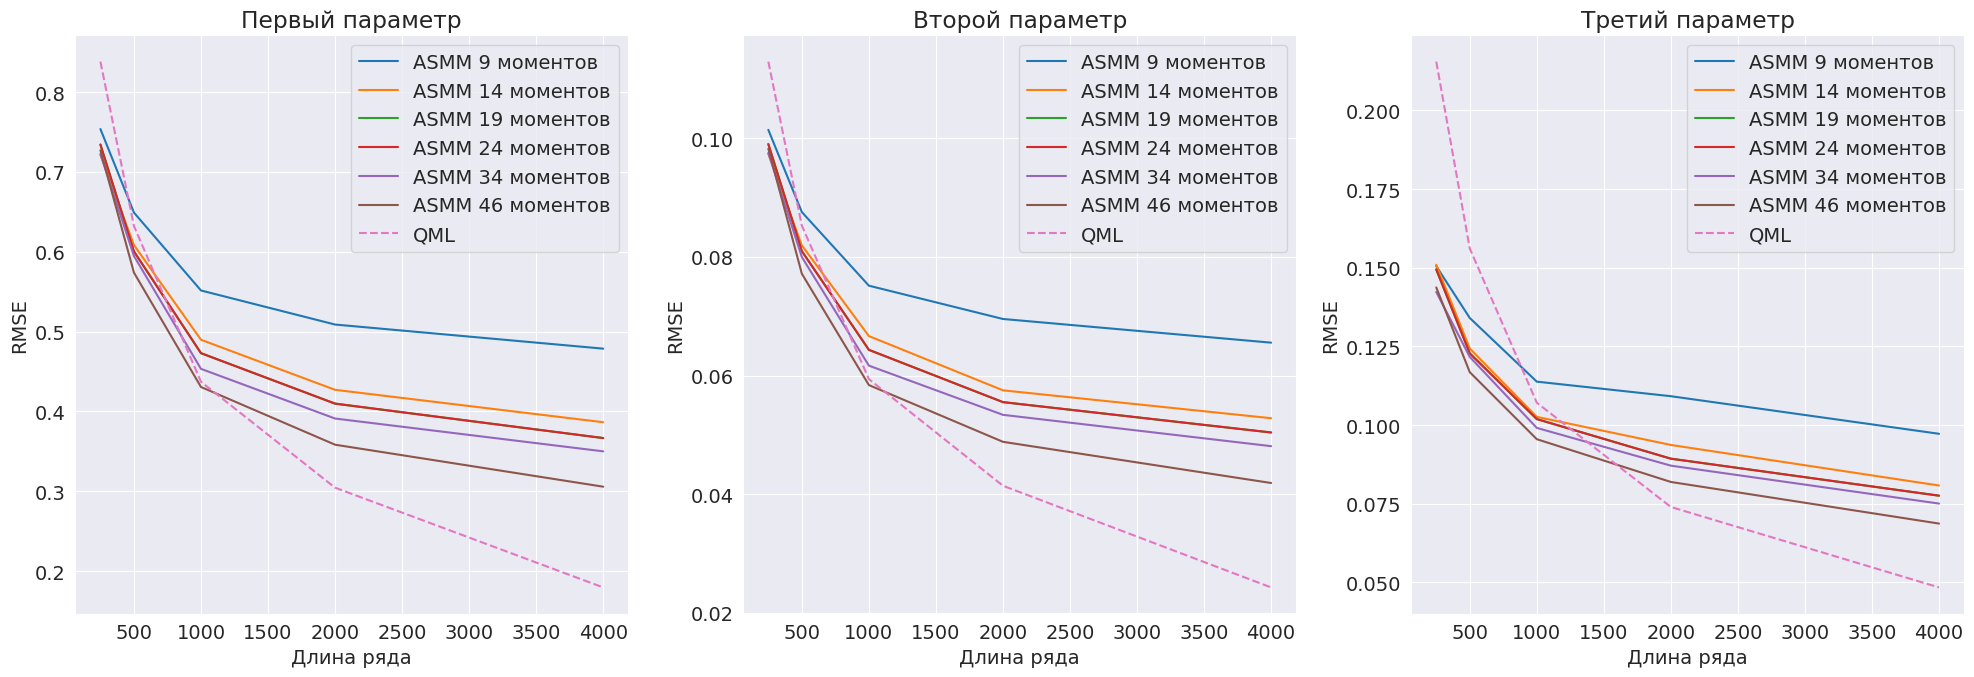

In [98]:
params_count = 3
fig, ax = plt.subplots(nrows=1, ncols=params_count, figsize=(20, 7))

linesytles = ["-" for _ in range(len(moments_counts))] + ["--"]


for name_df, linestyle in zip(read_rmses(paths_to_summaries, names), linesytles):
    name, df = name_df
    for param_idx in range(1, params_count + 1):
        sns.lineplot(data=df, x="length", y=f"rmse_{param_idx}", ax=ax[param_idx-1], label=name, linestyle=linestyle)    

for axis in ax:
    axis.set_xlabel("Длина ряда")
    axis.set_ylabel("RMSE")

ax[0].set_title("Первый параметр")
ax[1].set_title("Второй параметр")
ax[2].set_title("Третий параметр")

plt.tight_layout()

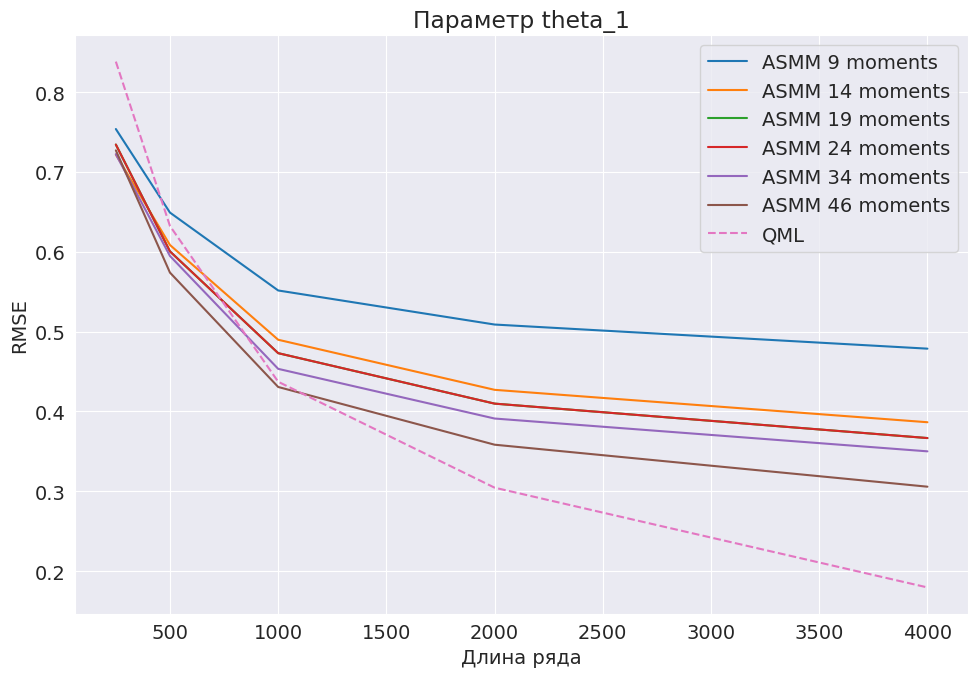

In [92]:
plot_param_rmse(paths_to_summaries, names, 1, moments_counts)

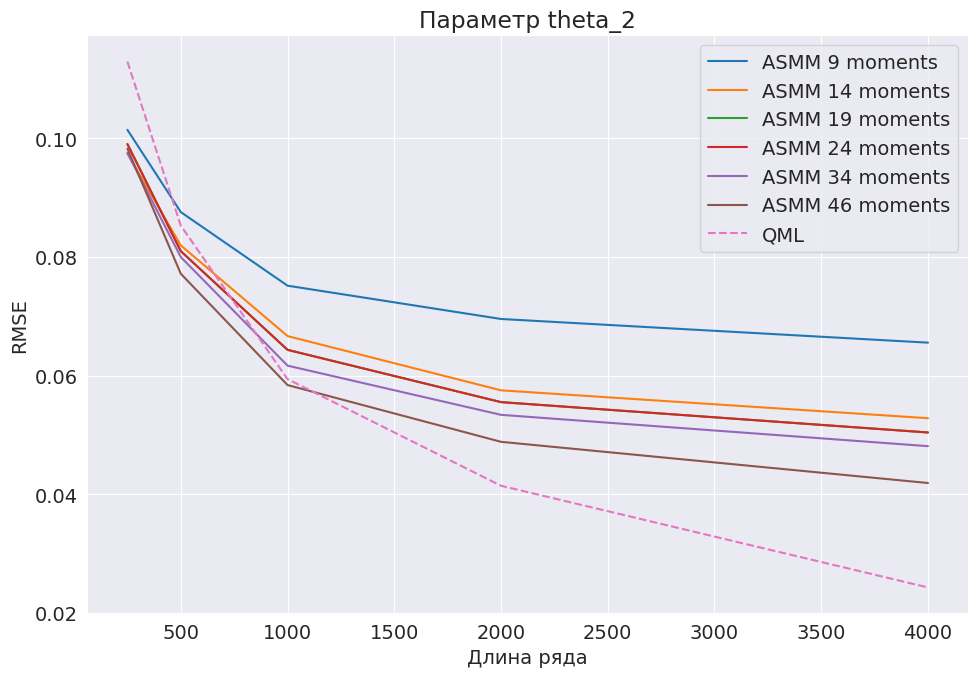

In [93]:
plot_param_rmse(paths_to_summaries, names, 2, moments_counts)

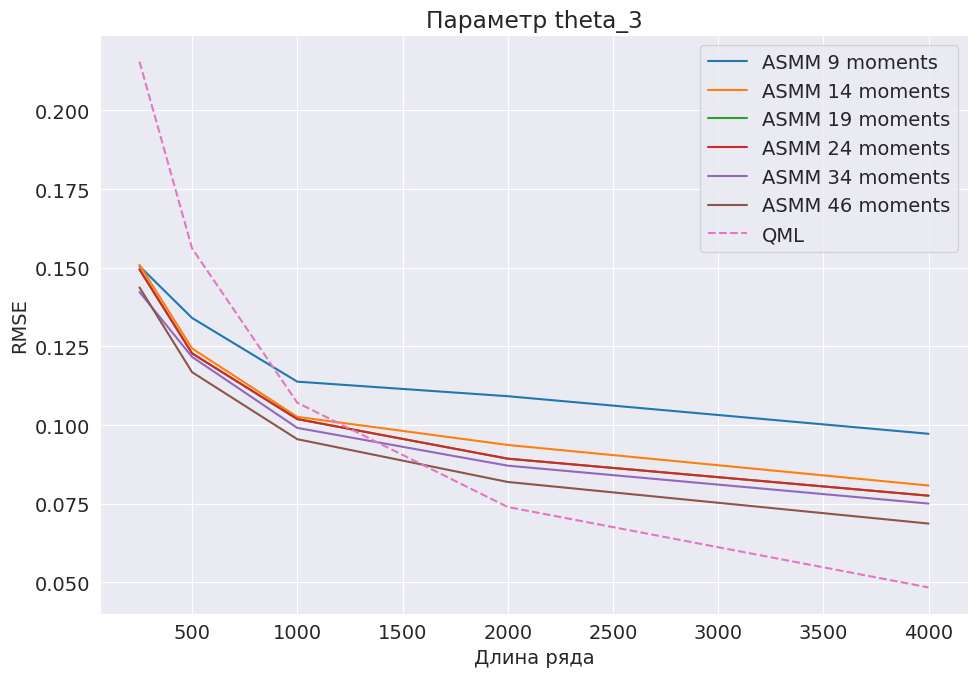

In [94]:
plot_param_rmse(paths_to_summaries, names, 3, moments_counts)